<div style="border:solid green 3px; padding: 20px">
																							
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


(23699, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

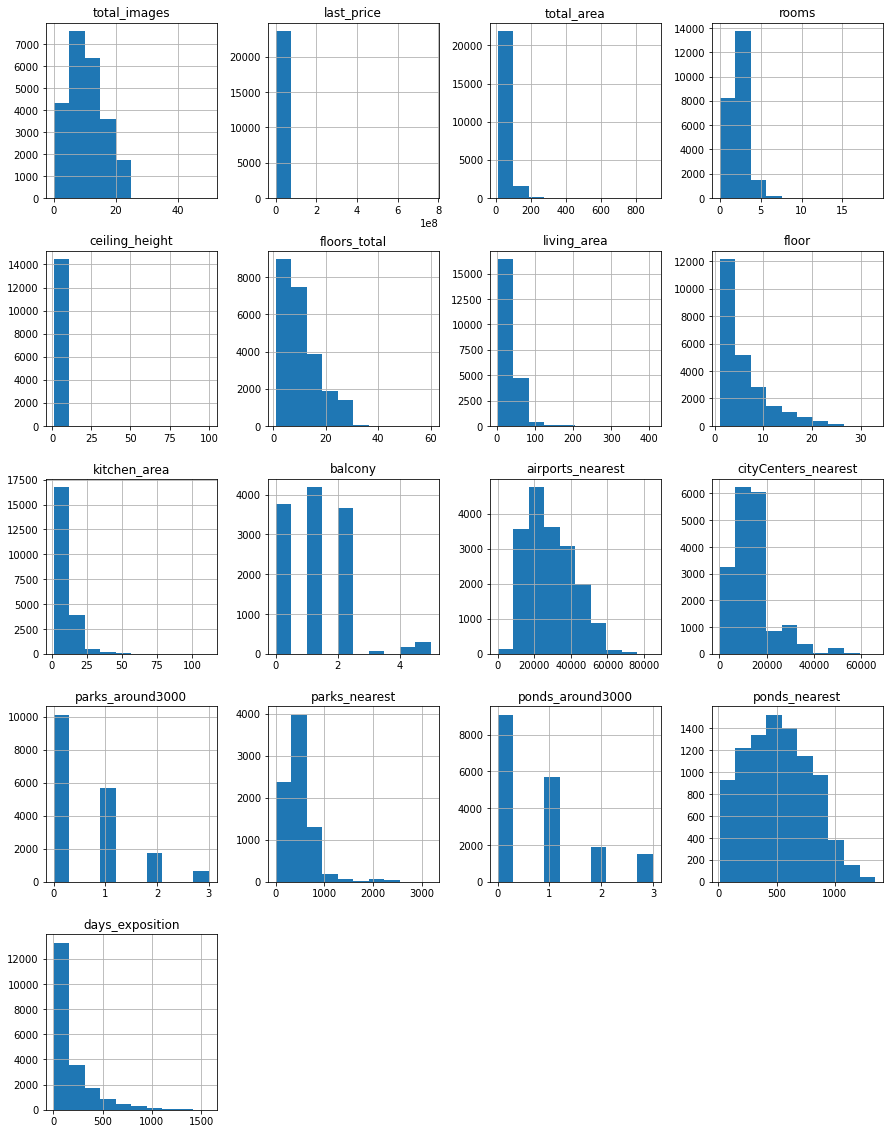

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#Общая информация
display(df.head())
display(df.shape)
display(df.info())
print(df.describe())
df.hist(figsize=(15, 20));


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправил
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для вывода таблиц лучше использовать функцию display
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Применил display
</div>

 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Вау, круто! Спасибо!
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Вывод добавил
</div>

Вывод:
По результату предварительного анализа данных следует обратить на следующее:
1. Отмечаются пропуски по ряду данных (населенные пункты, балконы и др.). 
2. Есть несоответствие с типом данных (дата, булевые значения и др.)
3. Есть неявные дубликаты в названиях населенных пунктах.
4. Отмечаются пиковые значения.
Необходимо изучить и проработать вышеуказанную информацию.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Выполните предобработку данных

In [3]:
#Поиск пропущенных значений в столбцах
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Обработка пропущенных значений

##### Расчеты

In [4]:
df.fillna({
    'ceiling_height':df['ceiling_height'].median(),
    'floors_total':df['floors_total'].median(),
    'living_area':df['living_area'].median(),
    'is_apartment':False,
    'kitchen_area':df['kitchen_area'].median(),
    'balcony':0,
    #'airports_nearest':df['airports_nearest'].median(),
    #'cityCenters_nearest':df['cityCenters_nearest'].median(),
    'parks_around3000':0,
    #'parks_nearest':0,
    'ponds_around3000':0,
    #'ponds_nearest':0,
    #'days_exposition':df['days_exposition'].median()
         
}, inplace=True)

#locality_name - название населённого пункта. Незначительная доля. Удаляем.
df = df.dropna(subset=['locality_name'])


#Проверяем
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Заполняя пропуски в столбцах living_area и kitchen_area одним значением необходимо проверить чтобы жилая(кухонная) площадь не была больше общей. Лучше использовать группировку по количеству комнат или вообще не заменять пропуски.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поправил
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>days_exposition - если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>days_exposition - поправил
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Удалить пропуски в столбце locality_name - это хорошее решение. 
</div>

##### Выводы: 
По результатам анализа пропусков можно сделать следующие выводы.
- Пропуски по ключевым показателям таким, как жилая площадь в квадратных метрах (м²) и площадь кухни имеют незначительную долю и в основном связаны с техническими ошибками при анкетировании продавцов. Также отмечаются пропуски по значениям, которые скорее всего связаны с низкой значимостью для клиента. Так это касается, высоты потолков и количества этажей в доме. Все эти пропуски заполняем медианными значениями. В последствии можно скорректировать при выявлении аномалий.
- Все пропуски, которые были возникли при автоматической выгрузке данных похоже связаны с техническими ошибками и отсутствием информации. В связи с этим по значениям, которые связаны с расстояниями пропуски заменяем медианой. Что интересно фактическое расстояние от аэропорта Пулкова до СПб – 20 км, медиана 26. В целом можно сделать вывод, что подход релевантный.
- Что касается информации о рекреационной инфраструктуры (парки и водоемы), то предполагаем, что пропуски связаны с их отсутствием (0).
Есть ряд особенностей. 
- Можно предположить, что многие продавцы квартир не стали делать отметку в поле «апартаменты» поэтому считаем, что пропущенные данные – это неотмеченные квартиры (используем False). 
- Балконы – исходим из того, что данные отсутствуют по кейсам, когда у продавца нет балкона (0). 
- Название населённого пункта – технические ошибки и их доля их незначительная. Удаляем.


#### Рассмотрим типы данных

##### Преобразуем данные

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8             0  ...   
1            2.65          11.0         18.6      1             0  ...   
2            2.65           5.0         34.3      4             0  ...   
3            2.65          14.0         30.0      9             0  ...   
4            3.03          14.0         32.0     13             0  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      0.0  Санкт-Петербург           18863.0   
1 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'is_apartment'}>],
       [<AxesSubplot:title={'center':'studio'}>,
        <AxesSubplot:title={'center':'open_plan'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesS

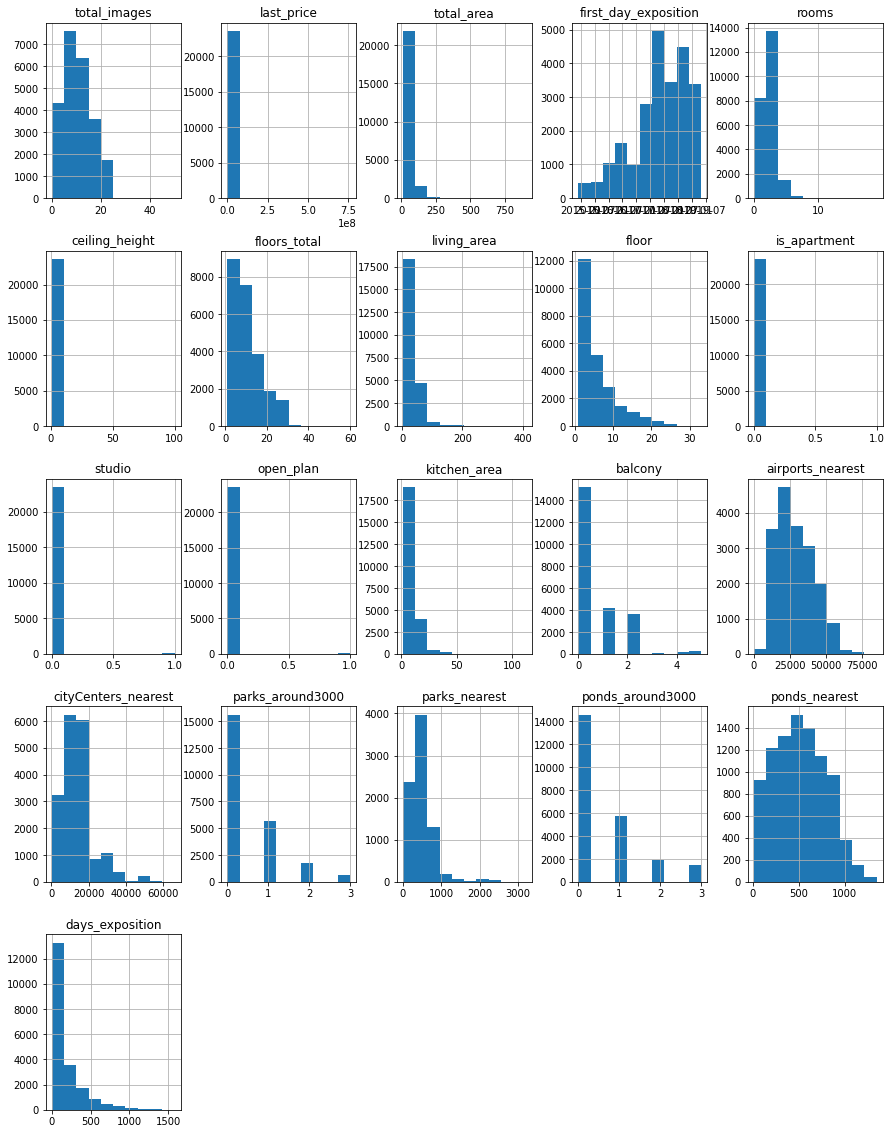

In [5]:
# Преобразование нескольких столбцов в числовой тип (int)
columns_to_convert = ['is_apartment', 'studio', 'open_plan']
df[columns_to_convert] = df[columns_to_convert].astype(int)

#Преобразование даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Проверяем
print(df.head())
print(df.info())
print(df.describe())
df.hist(figsize=(15, 20))

##### Пояснения:
Для дальнейшего анализа преобразуем данные по следующим показателям:
1.	Преобразуем булевые данные в числовые (True в 1 и False в 0) по таким показателям как апартаменты (is_apartment), квартира-студия (studio) и свободная планировка (open_plan). Это обеспечит совместимость с алгоритмами машинного обучения, удобство агрегирования и статистики, а также упрощение математических операций.
2.	Преобразуем показатель дата публикации (first_day_exposition) в тип данных «дата» (object -> datetime64[ns])


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

#### Поиск и исправление неявных дубликатов

In [6]:
#Аналз уникальных значений
df['locality_name'].unique()
# Приведение к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower()

# Удаление лишних пробелов
df['locality_name'] = df['locality_name'].str.strip()

df['locality_name'] = df['locality_name'].replace({
    'посёлок':'поселок',
    'поселок городского типа': 'поселок',
    'городской поселок':'поселок'
       
}, regex=True)

#Проверяем
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок кузьмоловский', 'садовое товарищество новая ропша',
       'павловск', 'деревня пикколово', 'всеволожск', 'волхов',
       'кингисепп', 'приозерск', 'сестрорецк', 'деревня куттузи',
       'поселок аннино', 'поселок ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'ш

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

### Добавьте в таблицу новые столбцы

In [7]:
#Посчитаем и добавим информацию о стоимости одного кв метра помещения
df['price_meter']=round((df['last_price' ]/df['total_area' ]),2)

#Добавим данные о дне недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
df['weekday'] = df['first_day_exposition'].dt.weekday

#Добавить столбец месяц публикации объявления
df['month'] = df['first_day_exposition'].dt.month

#Год публикации объявления
df['year'] = df['first_day_exposition'].dt.year

#Тип этажа квартиры (значения — «первый», «последний», «другой)
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Применение функции к каждой строке и создание нового столбца
df['floor_type'] = df.apply(floor_type, axis=1)

#Расстояние до центра города в километрах
df['cityCenters_nearest_km']= (df['cityCenters_nearest' ]/1000).round()

print(df.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8             0  ...   
1            2.65          11.0         18.6      1             0  ...   
2            2.65           5.0         34.3      4             0  ...   
3            2.65          14.0         30.0      9             0  ...   
4            3.03          14.0         32.0     13             0  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0               2.0          755.0         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Общая площадь (total_area )

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
count    1902.000000
mean      146.913938
std        64.939601
min       100.000000
25%       109.200000
50%       125.000000
75%       158.900000
max       900.000000
Name: total_area, dtype: float64
count    231.000000
mean     283.144545
std       95.649093
min      200.000000
25%      222.000000
50%      250.000000
75%      308.750000
max      900.000000
Name: total_area, dtype: float64


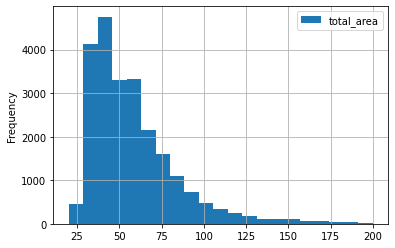

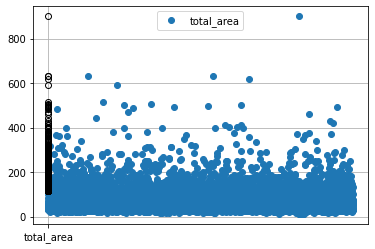

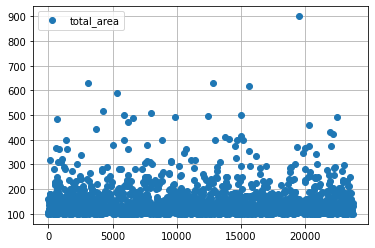

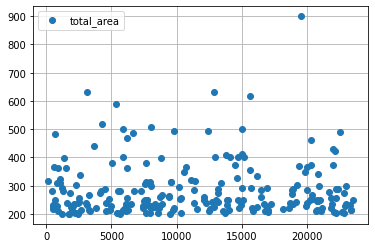

In [8]:
print(df['total_area'].describe())
df.plot(y='total_area', style='o', kind='hist',bins=21, range=(20, 200),grid=True)
df.plot(y='total_area', style='o',grid=True)
df.boxplot(column=['total_area'])


#Ищем выбросы
##анализ данных более или 100 кв.м
df.query('total_area>=100').plot(y='total_area', style='o',grid=True)

total_area_100 = df.query('total_area>=100') 
print(total_area_100['total_area'].describe())

##анализ данных более 200 кв.м
df.query('total_area>200').plot(y='total_area', style='o',grid=True)
total_area_200 = df.query('total_area>=200') 
print(total_area_200['total_area'].describe())

Вывод: По результату анализа можно сказать, что доля квартир с площадью более 200кв.м не превышает 1%. В целях выполнения задачи, данные кейсы можно не учитывать. Ниже представлен вид среза данных по квартирам с площадью более 20 и менее 200 кв.м

count    23384.000000
mean        58.192256
std         26.428175
min         20.100000
25%         40.000000
50%         52.000000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64


<AxesSubplot:>

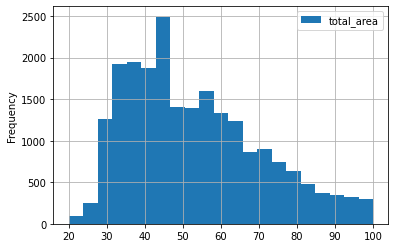

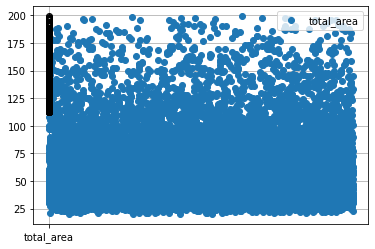

In [9]:
#Визуализируем выводы: анализ квартир с площадью более 20 и менее 200 кв.м
total_area_new = df.query('20<total_area<200')
print(total_area_new['total_area'].describe())
total_area_new.plot(y='total_area', style='o', kind='hist',bins=21, range=(20, 100),grid=True)
total_area_new.plot(y='total_area', style='o',grid=True)
total_area_new.boxplot(column=['total_area'])


#### Жилая площадь (living_area)

count    23650.000000
mean        34.091359
std         21.169359
min          2.000000
25%         19.000000
50%         30.000000
75%         41.037500
max        409.700000
Name: living_area, dtype: float64
count    3050.000000
mean       72.892895
std        32.996637
min        50.000000
25%        54.000000
50%        61.800000
75%        78.000000
max       409.700000
Name: living_area, dtype: float64
count    122.000000
mean     194.554098
std       51.461363
min      150.000000
25%      160.000000
50%      178.150000
75%      203.000000
max      409.700000
Name: living_area, dtype: float64


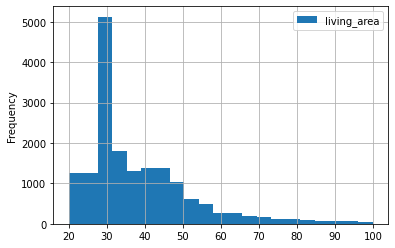

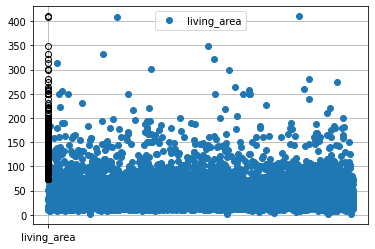

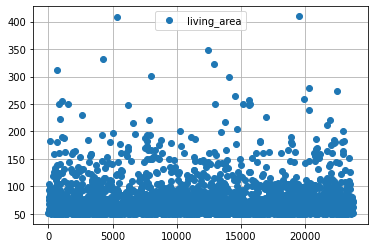

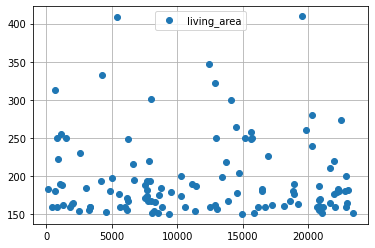

In [10]:
print(df['living_area'].describe())
df.plot(y='living_area', style='o', kind='hist',bins=21, range=(20, 100),grid=True)
df.plot(y='living_area', style='o',grid=True)
df.boxplot(column=['living_area'])


#Ищем выбросы
##анализ данных более или 50 кв.м
df.query('living_area>=50').plot(y='living_area', style='o',grid=True)
living_area_50 = df.query('living_area>=50') 
print(living_area_50['living_area'].describe())

##анализ данных более 150 кв.м
df.query('living_area>150').plot(y='living_area', style='o',grid=True)
living_area_100 = df.query('living_area>=150') 
print(living_area_100['living_area'].describe())

Вывод: По результату анализа можно сказать, что доля квартир с жилой площадью более 150 кв.м не превышает 0,5%. В целях выполнения задачи, данные кейсы можно не учитывать. Ниже представлен вид среза данных по квартирам с площадью менее 150 кв.м

count    23528.000000
mean        33.259309
std         17.396396
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        149.400000
Name: living_area, dtype: float64


<AxesSubplot:>

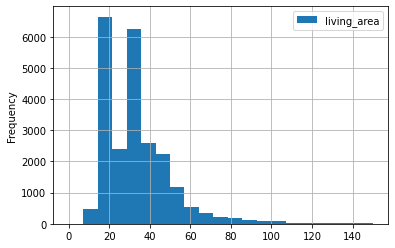

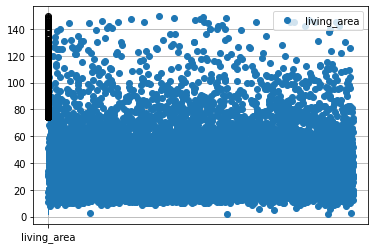

In [11]:
#Визуализируем выводы: анализ квартир с жилой площадью менее 150 кв.м
living_area_new = df.query('living_area<150')
print(living_area_new['living_area'].describe())
living_area_new.plot(y='living_area', style='o', kind='hist',bins=21, range=(0, 150),grid=True)
living_area_new.plot(y='living_area', style='o',grid=True)
living_area_new.boxplot(column=['living_area'])

#### Площадь кухни (kitchen_area)

count    23650.000000
mean        10.425715
std          5.628088
min          1.300000
25%          7.300000
50%          9.100000
75%         11.427500
max        112.000000
Name: kitchen_area, dtype: float64
count     58.000000
mean      62.834483
std       15.625637
min       50.000000
25%       51.000000
50%       57.100000
75%       65.000000
max      112.000000
Name: kitchen_area, dtype: float64
count      4.000000
mean     104.925000
std        5.670611
min      100.000000
25%      100.525000
50%      103.850000
75%      108.250000
max      112.000000
Name: kitchen_area, dtype: float64


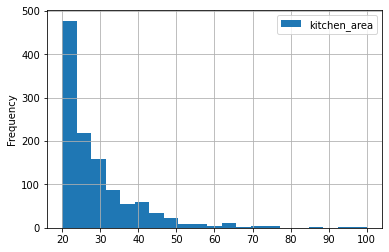

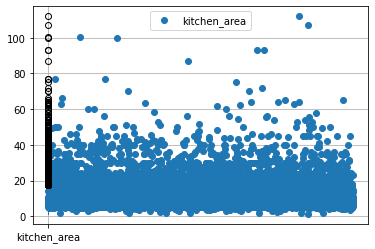

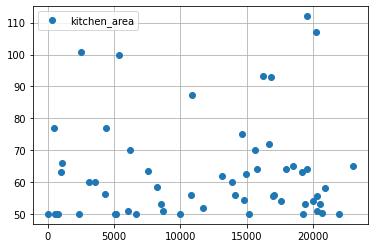

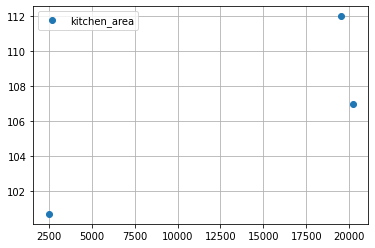

In [12]:
print(df['kitchen_area'].describe())
df.plot(y='kitchen_area', style='o', kind='hist',bins=21, range=(20, 100),grid=True)
df.plot(y='kitchen_area', style='o',grid=True)
df.boxplot(column=['kitchen_area'])


#Ищем выбросы
##анализ данных более или 50 кв.м
df.query('kitchen_area>=50').plot(y='kitchen_area', style='o',grid=True)
kitchen_area_50 = df.query('kitchen_area>=50') 
print(kitchen_area_50['kitchen_area'].describe())

##анализ данных более 100 кв.м
df.query('kitchen_area>100').plot(y='kitchen_area', style='o',grid=True)
kitchen_area_100 = df.query('kitchen_area>=100') 
print(kitchen_area_100['kitchen_area'].describe())

Вывод: По результату анализа можно сказать, что доля квартир с кухней площадью более 50 кв.м не превышает 0,2% (58). В целях выполнения задачи, данные кейсы можно не учитывать. Ниже представлен вид среза данных по квартирам с площадью кухни менее 50 кв.м

count    23592.000000
mean        10.296870
std          4.939011
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max         49.400000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

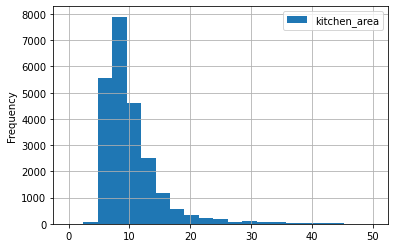

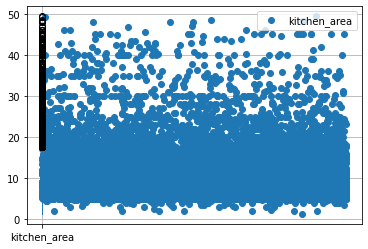

In [13]:
#Визуализируем выводы: анализ квартир с кухней площадью менее 50 кв.м
kitchen_area_new = df.query('kitchen_area<50')
print(kitchen_area_new['kitchen_area'].describe())
kitchen_area_new.plot(y='kitchen_area', style='o', kind='hist',bins=21, range=(0, 50),grid=True)
kitchen_area_new.plot(y='kitchen_area', style='o',grid=True)
kitchen_area_new.boxplot(column=['kitchen_area'])

#### Цена объекта (last_price)

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    7.220000e+02
mean     4.241633e+07
std      4.732944e+07
min      2.000000e+07
25%      2.352500e+07
50%      2.861450e+07
75%      4.045306e+07
max      7.630000e+08
Name: last_price, dtype: float64


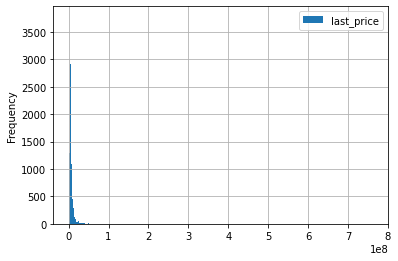

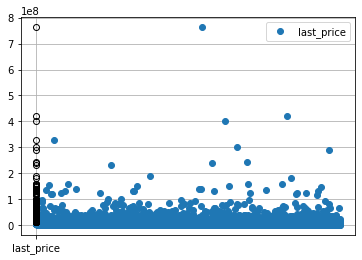

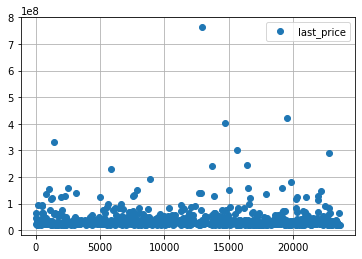

In [14]:
print(df['last_price'].describe())
df.plot(y='last_price', style='o', kind='hist',bins=1000,grid=True)
df.plot(y='last_price', style='o',grid=True)
df.boxplot(column=['last_price'])

#Ищем выбросы
##анализ данных с ценой более 20 млн руб
df.query('last_price>=20000000').plot(y='last_price', style='o',grid=True)
last_price_20 = df.query('last_price>=20000000') 
print(last_price_20['last_price'].describe())

Вывод: По результату анализа можно сказать, что доля квартир с ценой более 20 млн. руб не превышает 3% (722). В целях выполнения задачи, данные кейсы можно не учитывать. Ниже представлен вид среза данных по квартирам с ценой менее 20 млн руб

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Поясни пжл, что ты имеешь ввиду. 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Оставляю код ниже)
</div>



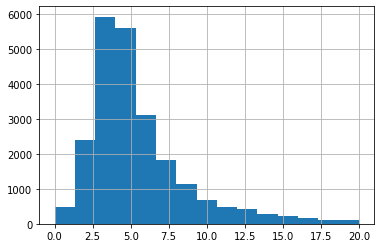

In [42]:
#код ревьюера
(df['last_price']/1000000).hist(range=(0, 20), bins=15);

count    2.292800e+04
mean     5.411421e+06
std      3.196707e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.999900e+07
Name: last_price, dtype: float64


<AxesSubplot:>

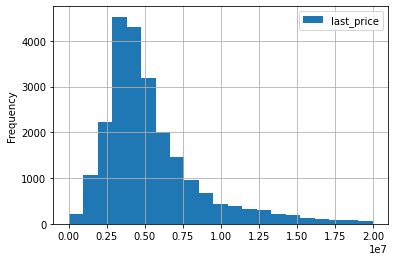

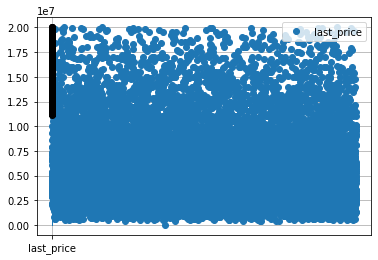

In [15]:
#Визуализируем выводы: анализ квартир с ценой менее 20 млн руб
last_price_new = df.query('last_price<20000000')
print(last_price_new['last_price'].describe())
last_price_new.plot(y='last_price', style='o', kind='hist',bins=21, range=(0, 20000000),grid=True)
last_price_new.plot(y='last_price', style='o',grid=True)
last_price_new.boxplot(column=['last_price'])

#### Количество комнат (rooms)

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    521.000000
mean       5.725528
std        1.439652
min        5.000000
25%        5.000000
50%        5.000000
75%        6.000000
max       19.000000
Name: rooms, dtype: float64


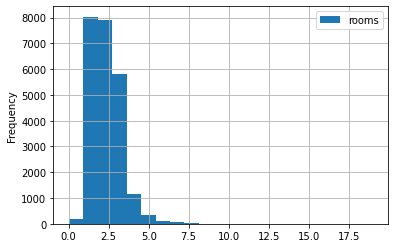

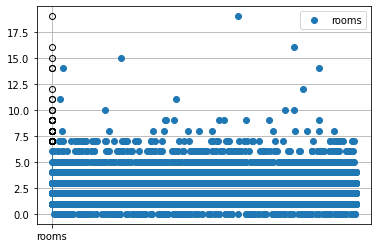

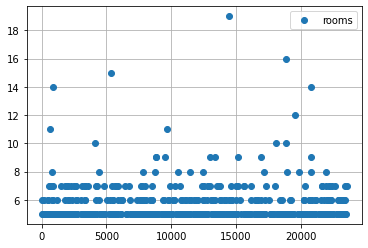

In [16]:
print(df['rooms'].describe())
df.plot(y='rooms', style='o', kind='hist',bins=21,grid=True)
df.plot(y='rooms', style='o',grid=True)
df.boxplot(column=['rooms'])

#Ищем выбросы
##анализ квартир с комнатами более 5ти
df.query('rooms>=5').plot(y='rooms', style='o',grid=True)
rooms_5 = df.query('rooms>=5') 
print(rooms_5['rooms'].describe())

Вывод: По результату анализа можно сказать, что доля квартир с количеством комнат более 5-ти не превышает 2% (521). В целях выполнения задачи, данные кейсы можно не учитывать. Ниже представлен вид среза данных по квартирам с менее чем 5 комнатами.

count    23258.000000
mean         2.046823
std          0.959605
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


<AxesSubplot:>

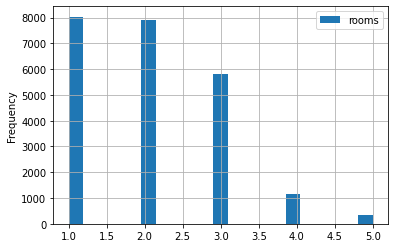

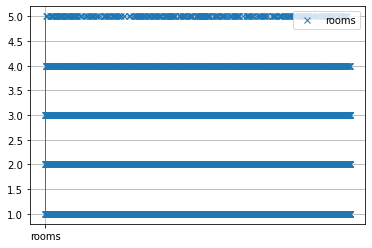

In [17]:
#Визуализируем выводы: анализ квартир с комнатами менее 5
rooms_new = df.query('0<rooms<=5')
print(rooms_new['rooms'].describe())
rooms_new.plot(y='rooms', style='o', kind='hist',bins=21, range=(1, 5),grid=True)
rooms_new.plot(y='rooms', style='x',grid=True)
rooms_new.boxplot(column=['rooms'])

#### Высота потолков(ceiling_height)

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
count    432.00000
mean       5.19838
std        6.77865
min        3.50000
25%        3.50000
50%        3.65500
75%        4.00000
max      100.00000
Name: ceiling_height, dtype: float64


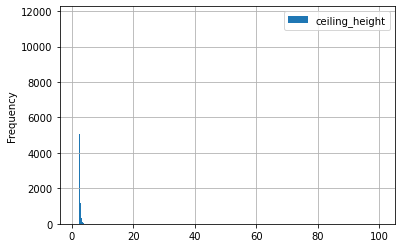

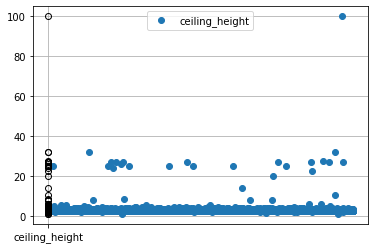

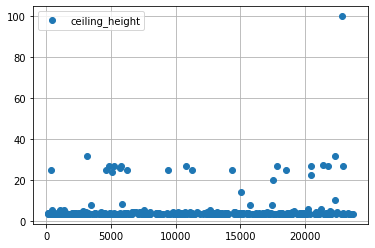

In [18]:
print(df['ceiling_height'].describe())
df.plot(y='ceiling_height', style='o', kind='hist',bins=1000,grid=True)
df.plot(y='ceiling_height', style='o',grid=True)
df.boxplot(column=['ceiling_height'])

#Ищем выбросы
##анализ квартир с комнатами более 3.5 метров
df.query('ceiling_height>=3.5').plot(y='ceiling_height', style='o',grid=True)
ceiling_height_3 = df.query('ceiling_height>=3.5') 
print(ceiling_height_3['ceiling_height'].describe())

Вывод: По результату анализа можно сказать, что доля квартир с высотой потолков более 3.5 м не превышает 2% (432). В целях выполнения задачи, данные кейсы можно не учитывать. Ниже представлен вид среза данных по квартирам с высотой потолков более 2.5 м и менее 3.5 м.

count    19760.000000
mean         2.716761
std          0.170912
min          2.510000
25%          2.650000
50%          2.650000
75%          2.720000
max          3.500000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

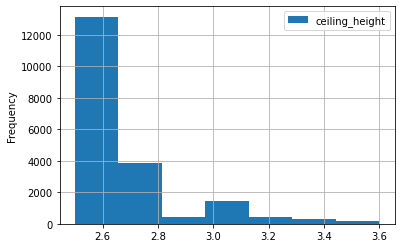

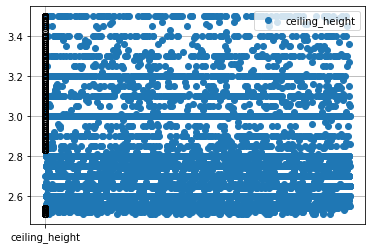

In [19]:
#Визуализируем выводы: анализ квартир с комнатами более 2 м и менее 3.5 м
ceiling_height_new = df.query('2.5<ceiling_height<=3.5')
print(ceiling_height_new['ceiling_height'].describe())
ceiling_height_new.plot(y='ceiling_height', style='o', kind='hist',bins=7, range=(2.5,3.6),grid=True)
ceiling_height_new.plot(y='ceiling_height', style='o',grid=True)
ceiling_height_new.boxplot(column=['ceiling_height'])

#### Тип этажа квартиры («первый», «последний», «другой») floor_type

In [20]:
quantity=df.shape[0]
df_floor_type = df.pivot_table(index='floor_type', values='floor', aggfunc=['count'])
df_floor_type['fraction'] = df_floor_type['count']/quantity
df_floor_type.columns = ['Количество','Доля']
print(df_floor_type)


            Количество      Доля
floor_type                      
другой           17403  0.735856
первый            2912  0.123129
последний         3335  0.141015


Вывод: Доля квартир, которые распалагаются на крайних этажах составляет около 26%. При этом они примерно поровну распределены между первыми и последними этажами.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Нет графика для категории этажей
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Добавил графики и выводы. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

,floor_type,count
0,другой,17403
1,первый,2912
2,последний,3335


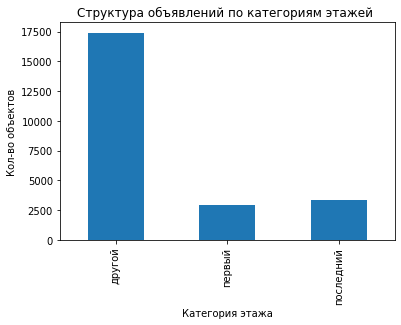

In [21]:
df_floor_type = df.groupby('floor_type')['floor_type'].count().reset_index(name='count')
display(df_floor_type)
# Plotting
df_floor_type.plot(kind='bar', x='floor_type', y='count', legend=False)
plt.xlabel('Категория этажа')
plt.ylabel('Кол-во объектов')
plt.title('Структура объявлений по категориям этажей ')
plt.show()


Вывод: Из графика выше можно заключить, что наибольшую долю объектов составляют квартиры, которые имеют не крайние этажи (последний и первый). Кол-во объявлений с крайними этажами примерно поровну разделились на те, которые расположены на первом и последнем этажах. 

#### Общее количество этажей в доме (floors_total)

count    23650.000000
mean        10.669852
std          6.583725
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
count    32.000000
mean     36.375000
std       5.283877
min      33.000000
25%      35.000000
50%      35.000000
75%      35.000000
max      60.000000
Name: floors_total, dtype: float64


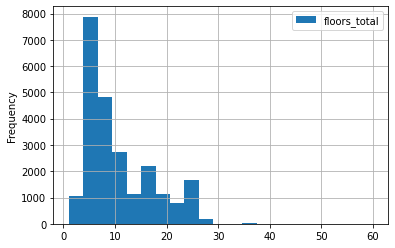

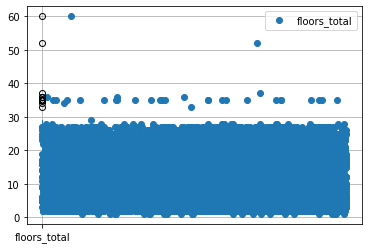

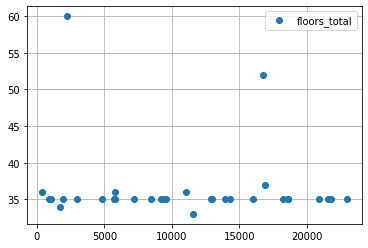

In [22]:
print(df['floors_total'].describe())
df.plot(y='floors_total', style='o', kind='hist',bins=21,grid=True)
df.plot(y='floors_total', style='o',grid=True)
df.boxplot(column=['floors_total'])

#Ищем выбросы
##анализ квартирв домах более 30 этажей
df.query('floors_total>=30').plot(y='floors_total', style='o',grid=True)
floors_total_30 = df.query('floors_total>=30') 
print(floors_total_30['floors_total'].describe())

Вывод: Доля квартир, которые распалагаются в домах с этажностью более 30 этажей составляет примерно 0,1% (32). В целях выполнения задачи, данные кейсы можно не учитывать. Ниже представлен вид среза данных по квартирам с этажностью до 30.

count    23618.000000
mean        10.635024
std          6.516979
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

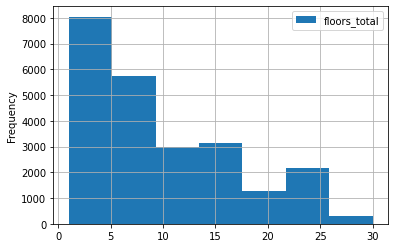

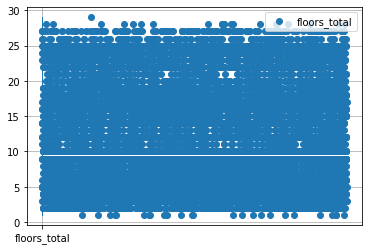

In [23]:
#Визуализируем выводы: анализ квартир в домах с этажностью до 30 этажей.
floors_total_new = df.query('floors_total<=30')
print(floors_total_new['floors_total'].describe())
floors_total_new.plot(y='floors_total', style='o', kind='hist',bins=7, range=(1,30),grid=True)
floors_total_new.plot(y='floors_total', style='o',grid=True)
floors_total_new.boxplot(column=['floors_total'])

#### Расстояние до центра города в метрах (cityCenters_nearest)

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
count      186.000000
mean     52329.096774
std       2953.826793
min      50009.000000
25%      51074.500000
50%      51677.000000
75%      52380.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


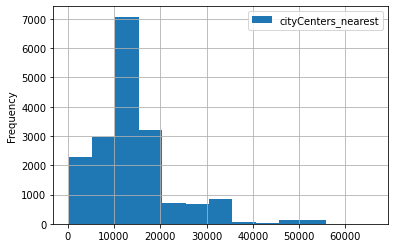

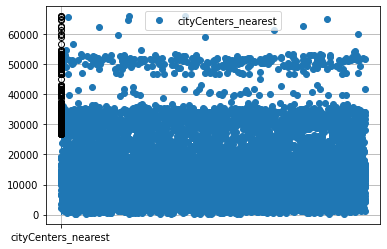

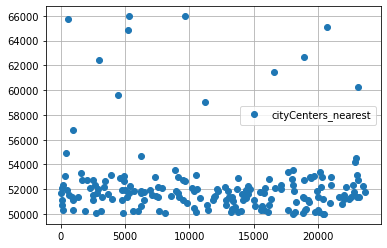

In [24]:
print(df['cityCenters_nearest'].describe())
df.plot(y='cityCenters_nearest', style='o', kind='hist',bins=13,grid=True)
df.plot(y='cityCenters_nearest', style='o',grid=True)
df.boxplot(column=['cityCenters_nearest'])

#Ищем выбросы
##анализ квартирв домах более 50 км
df.query('cityCenters_nearest>=50000').plot(y='cityCenters_nearest', style='o',grid=True)
cityCenters_nearest_30 = df.query('cityCenters_nearest>=50000') 
print(cityCenters_nearest_30['cityCenters_nearest'].describe())

Размер агломерации СПб простирается примерно на 50 км от центра города. Для поставленной задачи можно ограничется квартирами, находящимися в агломерации СПб (до 50 км). Доля квартир более 50 км - 0,8%(186).  Ниже представлен вид среза данных по квартирам, расположенные до 50 км от центра города.

count    17953.000000
mean     13802.806439
std       7715.847542
min        181.000000
25%       9183.000000
50%      13051.000000
75%      16183.000000
max      49984.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:>

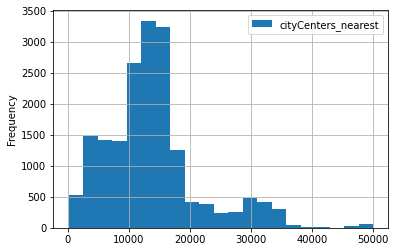

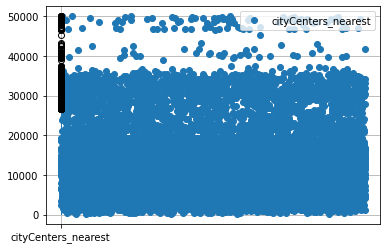

In [25]:
#Визуализируем выводы: анализ квартир до 50 км.
cityCenters_nearest_new = df.query('cityCenters_nearest<=50000')
print(cityCenters_nearest_new['cityCenters_nearest'].describe())
cityCenters_nearest_new.plot(y='cityCenters_nearest', style='o', kind='hist',bins=21,grid=True)
cityCenters_nearest_new.plot(y='cityCenters_nearest', style='o',grid=True)
cityCenters_nearest_new.boxplot(column=['cityCenters_nearest'])

#### Расстояние до ближайшего парка (parks_nearest)

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64
count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


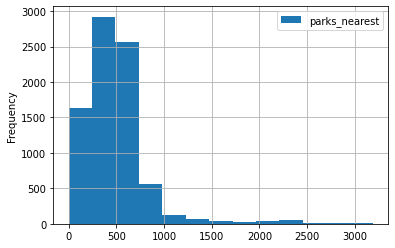

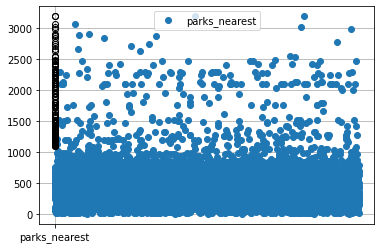

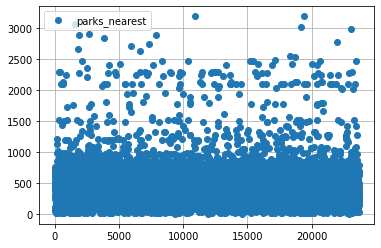

In [26]:
print(df['parks_nearest'].describe())
df.plot(y='parks_nearest', style='o', kind='hist',bins=13,grid=True)
df.plot(y='parks_nearest', style='o',grid=True)
df.boxplot(column=['parks_nearest'])

#Ищем выбросы
##анализ квартирв, которые имеют в близи (до 3км) парки.
df.query('parks_nearest>0').plot(y='parks_nearest', style='o',grid=True)
parks_nearest_0 = df.query('parks_nearest>0') 
print(parks_nearest_0['parks_nearest'].describe())

В Санкт-Петербурге насчитывается около 68 парков, что и повлияло на представленную информацию. Доля квартир, которые имеют поблизости парки составляет около 34% (8064)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

#### Обновим базу данных с учетом проведенного выше анализа

In [27]:
df_new = df.query('(20<total_area<200) and (living_area<150) and (kitchen_area<50)  and (last_price<20000000)  and (0<rooms<=5)  and (2.5<ceiling_height<=3.5)  and (floors_total<=30)  and (cityCenters_nearest<=50000)')
print()
print(f'Доля очищенного датафрейма {df_new.shape[0]*100/df.shape[0]}%')
print()
print('Общие параметры очищенного датафрейма')
print()
print(df_new.describe())



Доля очищенного датафрейма 60.295983086680764%

Общие параметры очищенного датафрейма

       total_images    last_price    total_area         rooms  ceiling_height  \
count  14260.000000  1.426000e+04  14260.000000  14260.000000    14260.000000   
mean       9.938219  6.358103e+06     59.708883      2.048878        2.719849   
std        5.680019  3.212708e+06     24.495759      0.954793        0.173071   
min        0.000000  1.219000e+04     20.100000      1.000000        2.510000   
25%        6.000000  4.100000e+06     41.300000      1.000000        2.650000   
50%       10.000000  5.392500e+06     54.500000      2.000000        2.650000   
75%       14.000000  7.550000e+06     72.000000      3.000000        2.750000   
max       50.000000  1.999900e+07    199.200000      5.000000        3.500000   

       floors_total   living_area         floor  is_apartment        studio  \
count  14260.000000  14260.000000  14260.000000  14260.000000  14260.000000   
mean      11.854418     

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

#### Как быстро продавались квартиры 

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64
count    12647.000000
mean       182.139559
std        222.278773
min          2.000000
25%         44.000000
50%         97.000000
75%        231.000000
max       1553.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

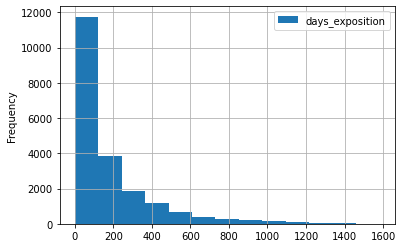

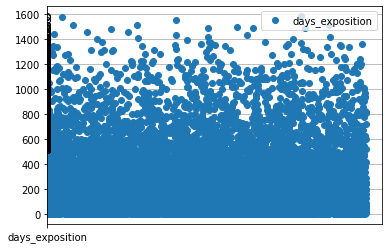

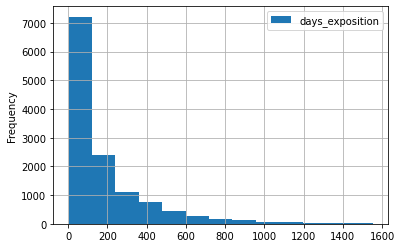

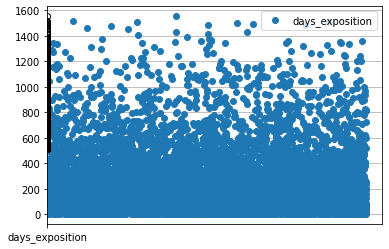

In [28]:
#Исходный датафрейм
print(df['days_exposition'].describe())
df.plot(y='days_exposition', style='o', kind='hist',bins=13,grid=True)
df.plot(y='days_exposition', style='o',grid=True)
df.boxplot(column=['days_exposition'])

#Очищенный датафрейм
print(df_new['days_exposition'].describe())
df_new.plot(y='days_exposition', style='o', kind='hist',bins=13,grid=True)
df_new.plot(y='days_exposition', style='o',grid=True)
df_new.boxplot(column=['days_exposition'])


#### Причины быстрых продаж

In [29]:
#Проанализируем представив данные по временным интервалам
##Определяем границы интервалов и соответствующие метки
bins = [0, 95, 200, 365, float('inf')]
labels = ['до 95 дней', '96-200 дней', '201-365 дней', 'более 365 дней']

## Создаем новую колонку с интервалами
df['sale_period_group'] = pd.cut(df['days_exposition'], bins=bins, labels=labels, right=False)

##Группируем данные по новым интервалам
df_period_group = df.groupby('sale_period_group').agg({
    'price_meter': 'median',
    'total_area': 'median',
    'last_price': 'median', 
    'living_area': 'median',
    'kitchen_area': 'median',
    'rooms': 'median',
    'floor': 'median',
    'weekday': 'median',
    'month': 'median',
    'year': 'median',
    'days_exposition': 'count'
})

print(df_period_group)

                   price_meter  total_area  last_price  living_area  \
sale_period_group                                                     
до 95 дней           94562.405        47.8   4350000.0         30.0   
96-200 дней          93549.390        52.0   4600000.0         30.0   
201-365 дней         92137.590        54.3   4700000.0         30.2   
более 365 дней       94285.710        57.0   5050000.0         31.0   

                   kitchen_area  rooms  floor  weekday  month  year  \
sale_period_group                                                     
до 95 дней                  9.1      2      5        3      7  2018   
96-200 дней                 9.1      2      4        3      7  2017   
201-365 дней                9.1      2      4        2      6  2017   
более 365 дней              9.4      2      4        2      6  2016   

                   days_exposition  
sale_period_group                   
до 95 дней                   10186  
96-200 дней                   4418 

Выводы: В исходном и очищенном датафрейме средний срок продажи квартир составляет 169 дней, а медианное значение - 95 дней. Максимальный срок продажи - около 4-х лет. Быстрые продажи - до 95 дней, свыше 200 дней - длительные продажи.
Стоит отметить, что наиболее быстро продаются квартиры, у которых более низкая общая стоимость. При этом на скорость не оказывает влияние стоимость квадратного метра. Так, квартиры с минимальной средней стоимостью одного квадратного метра (92 тыс.) продаются от 201 до 365 дней. В то время как в течение 95 дн продаются более дорогие за кв.м  квартиры (94 тыс/кв.м). Это связано с тем, что в первом случае общая стоимость составляет 4,7 млн. руб, а в другом - 4,3 млн. руб.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Факторы, больше всего влияющие на общую (полную) стоимость объекта(last_price)

Исходный датафрейм
Коэф.корреляции стоимости и общей площади 0.6537428966335393
Очищенный датафрейм
Коэф.корреляции стоимости и общей площади 0.8085972859845985


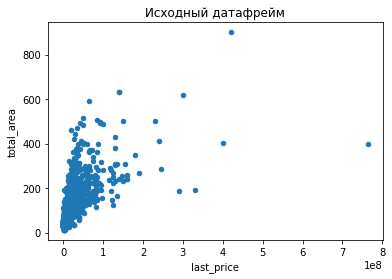

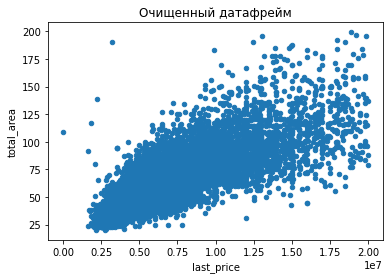

In [30]:
#Анализ связи last_price с общей площадью (total_area)
##Исходный датафрейм
print('Исходный датафрейм')
df.plot(x='last_price', y='total_area', kind='scatter', title='Исходный датафрейм')
print(f'Коэф.корреляции стоимости и общей площади {df["last_price"].corr(df["total_area"])}')
##Очищенный датафрейм
print('Очищенный датафрейм')
df_new.plot(x='last_price', y='total_area', kind='scatter', title='Очищенный датафрейм')
print(f'Коэф.корреляции стоимости и общей площади {df_new["last_price"].corr(df_new["total_area"])}')

Выводы: Коэффициент корреляции 0,77 указывает на сильную положительную линейную зависимость между двумя показателями.
Это значит, что в большинстве случаев с увеличением общей площади ведет к росту стоимости квартир. 
Вывод соответствует ожиданиям и может быть использован при прогнозировании цен. Визуализация также подтверждает данный вывод.


Исходный датафрейм
Коэф.корреляции стоимости и общей площади 0.5406987158876255
Очищенный датафрейм
Коэф.корреляции стоимости и общей площади 0.6612019851515231


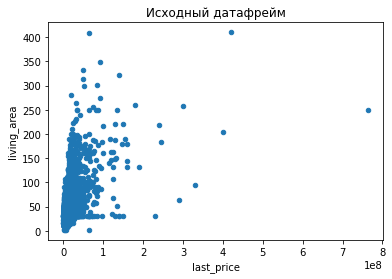

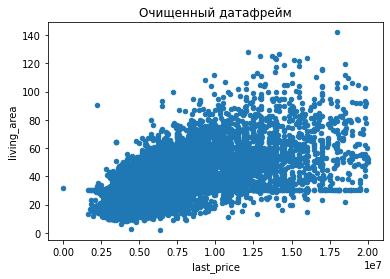

In [31]:
#Анализ связи last_price с жилой площадью (living_area)
##Исходный датафрейм
print('Исходный датафрейм')
df.plot(x='last_price', y='living_area', kind='scatter', title='Исходный датафрейм')
print(f'Коэф.корреляции стоимости и общей площади {df["last_price"].corr(df["living_area"])}')
##Очищенный датафрейм
print('Очищенный датафрейм')
df_new.plot(x='last_price', y='living_area', kind='scatter', title='Очищенный датафрейм')
print(f'Коэф.корреляции стоимости и общей площади {df_new["last_price"].corr(df_new["living_area"])}')

Вывод: Коэффициент корреляции 0.625 указывает на умеренную положительную линейную зависимость. 
По мере увеличения жилой площади стоимость квартиры также в среднем увеличивается, 
но не так сильно, как при сильной корреляции с общей площадью.
Связь не настолько сильная, чтобы можно было уверенно прогнозировать одно значение по другому.

Исходный датафрейм
Коэф.корреляции стоимости и общей площади 0.4406021561153903
Очищенный датафрейм
Коэф.корреляции стоимости и общей площади 0.5474194822290737


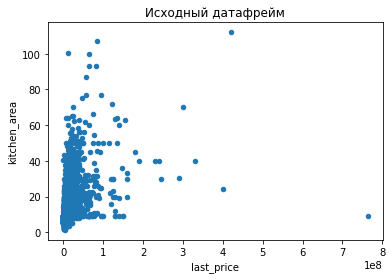

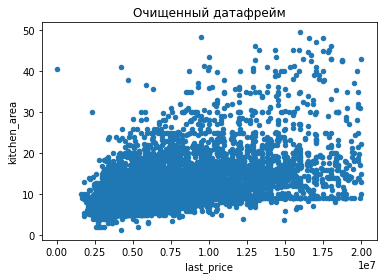

In [32]:
#Анализ связи last_price с площадью кухни (kitchen_area)
##Исходный датафрейм
print('Исходный датафрейм')
df.plot(x='last_price', y='kitchen_area', kind='scatter', title='Исходный датафрейм')
print(f'Коэф.корреляции стоимости и общей площади {df["last_price"].corr(df["kitchen_area"])}')
##Очищенный датафрейм
print('Очищенный датафрейм')
df_new.plot(x='last_price', y='kitchen_area', kind='scatter', title='Очищенный датафрейм')
print(f'Коэф.корреляции стоимости и общей площади {df_new["last_price"].corr(df_new["kitchen_area"])}')

Вывод: Коэффициент корреляции 0.53 указывает на умеренную положительную линейную зависимость. 
По мере увеличения площади кухни стоимость квартиры также в среднем увеличивается, 
но не так сильно, как при сильной корреляции с общей площадью.
Связь не настолько сильная, чтобы можно было уверенно прогнозировать одно значение по другому.

Исходный датафрейм
Коэф.корреляции стоимости и общей площади 0.36342062218770704
Очищенный датафрейм
Коэф.корреляции стоимости и общей площади 0.5501819768341448


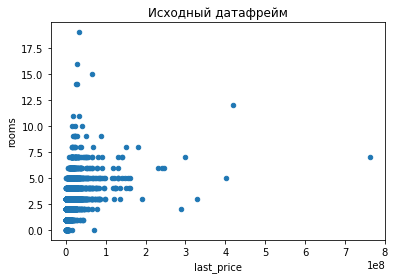

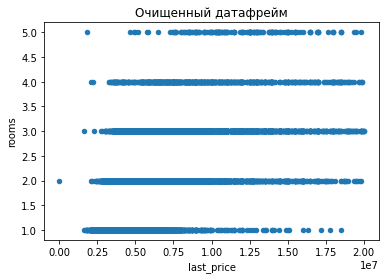

In [33]:
#Анализ связи last_price с количеством комнат (rooms)
##Исходный датафрейм
print('Исходный датафрейм')
df.plot(x='last_price', y='rooms', kind='scatter', title='Исходный датафрейм')
print(f'Коэф.корреляции стоимости и общей площади {df["last_price"].corr(df["rooms"])}')
##Очищенный датафрейм
print('Очищенный датафрейм')
df_new.plot(x='last_price', y='rooms', kind='scatter', title='Очищенный датафрейм')
print(f'Коэф.корреляции стоимости и общей площади {df_new["last_price"].corr(df_new["rooms"])}')

Вывод: Коэффициент корреляции 0.507 указывает на умеренно слабую положительную линейную зависимость. Связь не достаточно сильная для точного прогнозирования. 

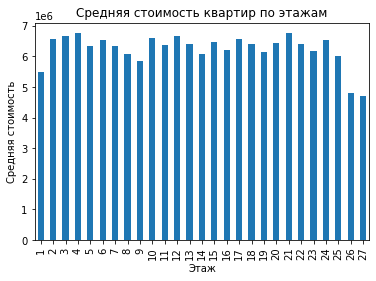

In [34]:
#Анализ связи last_price от этажа, на котором расположена квартира (floor)
##Исходный датафрейм
#print('Исходный датафрейм')
#df.plot(x='last_price', y='floor', kind='scatter', title='Исходный датафрейм')
#print(f'Коэф.корреляции стоимости и общей площади {df["last_price"].corr(df["floor"])}')
##Очищенный датафрейм
#print('Очищенный датафрейм')
#df_new.plot(x='last_price', y='floor', kind='scatter', title='Очищенный датафрейм')
#print(f'Коэф.корреляции стоимости и общей площади {df_new["last_price"].corr(df_new["floor"])}')

# Расчет средней стоимости для каждого этажа (очищенная база)
(df_new
 .groupby('floor')['last_price']
 .mean()
 .plot(
     kind='bar', 
     title='Средняя стоимость квартир по этажам',
     xlabel = 'Этаж',
     ylabel = 'Средняя стоимость')
);

Вывод: Цены на квартиры в целом не зависят от этажа и стабильны в диапозоне от 5 до 7 млн. руб. При этом на низкой границе диапозона находятся квартиры, находящиеся на 1, 26 и 27 этажах.

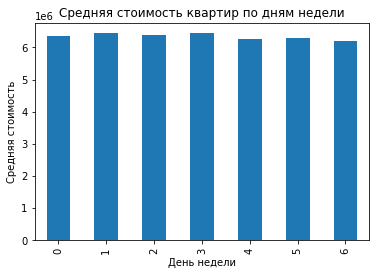

In [35]:
#Анализ связи last_price от дня недели
##Исходный датафрейм
#print('Исходный датафрейм')
#df.plot(x='last_price', y='weekday', kind='scatter', title='Исходный датафрейм')
#print(f'Коэф.корреляции стоимости и общей площади {df["last_price"].corr(df["weekday"])}')
##Очищенный датафрейм
#print('Очищенный датафрейм')
#df_new.plot(x='last_price', y='weekday', kind='scatter', title='Очищенный датафрейм')
#print(f'Коэф.корреляции стоимости и общей площади {df_new["last_price"].corr(df_new["weekday"])}')

# Расчет средней стоимости для каждого дня недели (очищенная база)
(df_new
 .groupby('weekday')['last_price']
 .mean()
 .plot(
     kind='bar', 
     title='Средняя стоимость квартир по дням недели',
     xlabel = 'День недели',
     ylabel = 'Средняя стоимость')
);

Вывод: Цены на квартиры в целом не зависят от дня недели. 

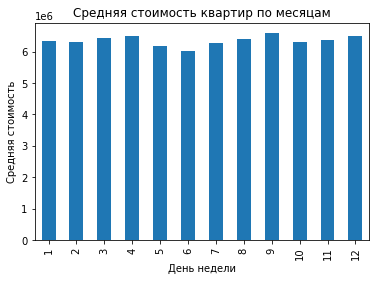

In [36]:
#Анализ связи last_price от месяца
##Исходный датафрейм
#print('Исходный датафрейм')
#df.plot(x='last_price', y='month', kind='scatter', title='Исходный датафрейм')
#print(f'Коэф.корреляции стоимости и общей площади {df["last_price"].corr(df["month"])}')
##Очищенный датафрейм
#print('Очищенный датафрейм')
#df_new.plot(x='last_price', y='month', kind='scatter', title='Очищенный датафрейм')
#print(f'Коэф.корреляции стоимости и общей площади {df_new["last_price"].corr(df_new["month"])}')

# Расчет средней стоимости для каждого месяца (очищенная база)
(df_new
 .groupby('month')['last_price']
 .mean()
 .plot(
     kind='bar', 
     title='Средняя стоимость квартир по месяцам',
     xlabel = 'День недели',
     ylabel = 'Средняя стоимость')
);


Вывод: Цены на квартиры в целом не зависят от месяца. 

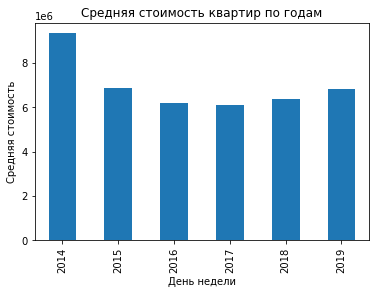

In [37]:
#Анализ связи last_price от года
##Исходный датафрейм
#print('Исходный датафрейм')
#df.plot(x='last_price', y='year', kind='scatter', title='Исходный датафрейм')
#print(f'Коэф.корреляции стоимости и общей площади {df["last_price"].corr(df["year"])}')
##Очищенный датафрейм
#print('Очищенный датафрейм')
#df_new.plot(x='last_price', y='year', kind='scatter', title='Очищенный датафрейм')
#print(f'Коэф.корреляции стоимости и общей площади {df_new["last_price"].corr(df_new["year"])}')

# Расчет средней стоимости для каждого месяца (очищенная база)
(df_new
 .groupby('year')['last_price']
 .mean()
 .plot(
     kind='bar', 
     title='Средняя стоимость квартир по годам',
     xlabel = 'День недели',
     ylabel = 'Средняя стоимость')
);

Вывод: Цены на квартиры в целом не зависят от года. Вместе с тем, в 2014 году отмечается всплеск стоимости, что связано с ажиотажным спросом в период кризиса (нестабильностью курса рубля и инфляционные ожидания).

In [38]:
#Сведем информацию в единую таблицу
corr_total_area = df_new["last_price"].corr(df_new["total_area"])
corr_living_area = df_new["last_price"].corr(df_new["living_area"])
corr_kitchen_area = df_new["last_price"].corr(df_new["kitchen_area"])
#corr_floor = df_new["last_price"].corr(df_new["floor"])
#corr_weekday = df_new["last_price"].corr(df_new["weekday"])
#corr_month = df_new["last_price"].corr(df_new["month"])
#corr_year = df_new["last_price"].corr(df_new["year"])
data_corr = {
    'total_area':[corr_total_area],
    'living_area':[corr_living_area],
    'kitchen_area':[corr_kitchen_area]
    #'floor':[corr_floor],
    #'weekday':[corr_weekday],
    #'month':[corr_month],
    #'year':[corr_year]
}
df_new_corr = pd.DataFrame(data_corr)

display(df_new_corr )

# Оценка уровня корреляции
def correlation_level(corr):
    if corr >= 0.7:
        return "Сильная"
    elif 0.3 <= corr < 0.7:
        return "Умеренная"
    elif 0.1 <= corr < 0.3:
        return "Слабая"
    else:
        return "Очень слабая"

# Применяем функцию для оценки уровня корреляции ко всем значениям в датафрейме
df_new_corr_level = df_new_corr.applymap(correlation_level)
display(df_new_corr_level)

,total_area,living_area,kitchen_area
0,0.808597,0.661202,0.547419


,total_area,living_area,kitchen_area
0,Сильная,Умеренная,Умеренная


Выводы:
* Площадь квартиры. Отмечается сильная положительная зависимость площади квартиры и её стоимости. Квартиры с большей площадью имеют более высокую цену.
* Жилая площадь и площадь кухни имеют умеренную положительную зависимость со стоимостью квартиры. Большие жилая площадь и кухня обычно соответствуют более высокой цене.
* Очень слабая положительная зависимость между этажом и стоимостью. Это может быть связано с предпочтениями покупателей относительно этажа квартиры.
* День недели и месяц. Отсутствует зависимость между днем недели и месяцем и стоимостью квартиры. Эти факторы, вероятно, не оказывают значительного влияния на цену квартиры.
* Анализ стоимости квартиры по годам показал, что стоимость квартир может зависить от внешних факторов, таких как экономические и финансовые кризисы. Это видно по данным за 2014 год, когда на фоне кризиса отмечался ажиотажный спрос на недвижимость в ожиданиях инфляции и роста курса доллара. 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для категории этажа, дня, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно (это категориальные переменные). Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
    
<br>Тебе нужно удалить расчет корреляции для этих параметров и заменить графики
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Добавил графики и выводы. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

In [39]:
#10 населённых пунктах с наибольшим числом объявлений
print('Оценка по исходному датафрейму df')
print()
df.groupby('locality_name')['first_day_exposition'].count()
df_group_name = df.pivot_table(
    index='locality_name', 
    values='price_meter', 
    aggfunc=['count','mean']
)

df_group_name.columns = ['count','mean']
df_group_name['fraction_count'] = df_group_name['count']/df.shape[0]
df_group_name.sort_values(by='count', ascending  = False).head(10)

Оценка по исходному датафрейму df



,count,mean,fraction_count
locality_name,,,
санкт-петербург,15721,114849.008793,0.664736
поселок мурино,556,85681.762572,0.023510
поселок шушары,440,78677.364318,0.018605
всеволожск,398,68654.473970,0.016829
пушкин,369,103125.819377,0.015603
колпино,338,75424.579112,0.014292
поселок парголово,327,90175.913089,0.013827
гатчина,307,68746.146515,0.012981
деревня кудрово,299,92473.547559,0.012643


In [40]:
print('Оценка по очищенному датафрейму df_new')
df_new.groupby('locality_name')['first_day_exposition'].count()
df_new_group_name = df.pivot_table(
    index='locality_name', 
    values='price_meter', 
    aggfunc=['count','mean']
)

df_new_group_name.columns = ['count','mean']
df_new_group_name['fraction_count'] = df_group_name['count']/df_new.shape[0]
df_new_group_name.sort_values(by='count', ascending  = False).head(10)


Оценка по очищенному датафрейму df_new


,count,mean,fraction_count
locality_name,,,
санкт-петербург,15721,114849.008793,1.102454
поселок мурино,556,85681.762572,0.038990
поселок шушары,440,78677.364318,0.030856
всеволожск,398,68654.473970,0.027910
пушкин,369,103125.819377,0.025877
колпино,338,75424.579112,0.023703
поселок парголово,327,90175.913089,0.022931
гатчина,307,68746.146515,0.021529
деревня кудрово,299,92473.547559,0.020968


Выводы: В исходном и очищенном датафрейме в ТОП 10 входят одни и те же населённые пункты. При этом наибольшее количество объявлений приходиться на г. Санкт-Петербург (66% исходном и 84% в очищенном датафрейме). Доля остальных населенных пунктов не превышает 3%. Ожидаемо, что наиболее высокая цена отмечается у квартир, находящихся в г. Санкт-Петербург. Наименьшая цена в г. Выборг. Есть гипотеза, что стоимость квадратного метра существенно зависит от удаленности от центра города. Требуется провести проверку гипотезы.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

#### Расчет средней цены каждого километра

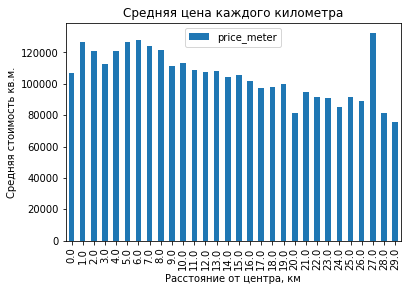

In [41]:
#df_spb = df_new[df_new['locality_name'] == 'санкт-петербург'].copy()
#df_spb.loc[:, 'price_per_km'] = df_spb['last_price'] / df_spb['cityCenters_nearest_km']

# Рассчитать среднюю цену за каждый километр
#price_per_km_avg = df_spb.groupby('cityCenters_nearest_km')['price_per_km'].mean().reset_index()
#price_per_km_avg.columns = ['distance_to_center_km', 'avg_price_per_km']
#display(price_per_km_avg)

#df_spb = df_new[df_new['locality_name'] == 'санкт-петербург'].copy()
#price_per_km_avg = df_spb.groupby('cityCenters_nearest_km')['last_price'].mean().reset_index()
#display(price_per_km_avg)


(df_new[df_new['locality_name'] == 'санкт-петербург']
 .groupby('cityCenters_nearest_km')['price_meter']
 .mean()
 .reset_index()
 .plot(x='cityCenters_nearest_km', 
       y='price_meter',
       kind='bar',
       title='Средняя цена каждого километра',
       xlabel = 'Расстояние от центра, км',
       ylabel = 'Средняя стоимость кв.м.')

);


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Делить общую стоимость на расстояния до центра не нужно. Нужно построить график используя среднюю цену за квадратный метр и расстояние до центра в километрах
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Добавил графики и выводы. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Выводы
1. Стоимость объектов уменьшается с увеличением расстояния от центра города:
 1. Квартиры в центре города значительно дороже остальных локаций.
 2. На расстоянии 1 км средняя цена составляет 120 тыс. руб за кв.м, что значительно выше, чем на большем расстоянии.
 3. По мере увеличения расстояния от центра города цена за километр постепенно уменьшается. 

2. Плавное снижение стоимости:
 1. График показывает плавное снижение средней стоимости за километр с увеличением расстояния до центра. Это подтверждает типичную тенденцию для большинства городов, где объекты недвижимости ближе к центру обычно дороже из-за большей доступности к инфраструктуре и центральным районам.
 2. Нестабильность цен на больших расстояниях: На расстояниях 27 км наблюдаются колебания средней цены, что может быть связано с различными факторами, такими как специфические особенности районов, наличие или отсутствие инфраструктуры и т.д. 

### Напишите общий вывод

В ходе проведенного исследования данных в целях определения параметров, влияющие на цену объектов. Можно сделать следующие выводы, которые могут быть использованы для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.
Выводы:
1.	В исходном и очищенном датафрейме средний срок продажи квартир составляет 169 дней, а медианное значение - 95 дней. Максимальный срок продажи - около 4-х лет. Быстрые продажи - до 95 дней, свыше 200 дней - длительные продажи. Стоит отметить, что наиболее быстро продаются квартиры, у которых более низкая общая стоимость. При этом на скорость не оказывает влияние стоимость квадратного метра. Так, квартиры с минимальной средней стоимостью одного квадратного метра (92 тыс.) продаются от 201 до 365 дней. В то время как в течение 95 дн продаются более дорогие за кв.м  квартиры (94 тыс/кв.м). Это связано с тем, что в первом случае общая стоимость составляет 4,7 млн. руб, а в другом - 4,3 млн. руб.
2.	Вышеуказанные выводы также подтверждаются расчетом коэффициента корреляции который выявил следующее:
   * Отмечается сильная положительная зависимость площади квартиры и её стоимости. Квартиры с большей площадью имеют более высокую цену.
   * Жилая площадь и площадь кухни имеют умеренную положительную зависимость со стоимостью квартиры. Большие жилая площадь и кухня обычно соответствуют более высокой цене.
   * Очень слабая положительная зависимость между этажом и стоимостью. Это может быть связано с предпочтениями покупателей относительно этажа квартиры. Вместе с тем, активно продаются квартиры, которые не являются крайними (не первый и не последний этаж).
   * День недели и месяц. Очень слабая или отсутствующая зависимость между днем недели, месяцем, годом и стоимостью квартиры. Эти факторы, вероятно, не оказывают значительного влияния на цену квартиры.
   * Год может иметь существенное влияние на ценообразование. Возможно наличие в течение определенного года внешних факторов, которые существено вляют на стоимость квартиры (кризис, санкции, рост инфляц и прочее).
3.	Наибольшее количество объявлений приходиться на г. Санкт-Петербург (84% в очищенном датафрейме). Доля остальных населенных пунктов не превышает 3%. Ожидаемо, что наиболее высокая цена отмечается у квартир, находящихся в г. Санкт-Петербург. Наименьшая цена в г. Выборг. 
4.	Вышеуказанный вывод подтверждает расчет средней стоимости каждого километра от центра города. Квартиры в центре города значительно дороже остальных локаций. Так, на расстоянии 1 км средняя цена составляет около 10 миллионов рублей за километр, что значительно выше, чем на большем расстоянии.  По мере увеличения расстояния от центра города цена за километр постепенно уменьшается. Например, на расстоянии 10 км цена составляет около 631 тысяч рублей за километр, а на расстоянии 20 км — около 251 тысяч рублей за километр. При этом отмечается плавное снижение стоимости:


С уважением,
Бородулин Алексей

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- написать короткий вывод после первичного просмотра данных +
<br>- не заполнять пропуски в столбцах с картографическими данными +	
<br>- не заполнять пропуски в столбце days_exposition +
<br>- построить график для категории этажей +
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления +
<br>- корректно рассчитать стоимость каждого километра в последнем шаге +

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Все исправил. Спасибо. 
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>